In [2]:
import pandas as pd
import phate
import scprep
import scanpy as sc
import anndata

# matplotlib settings for Jupyter notebooks only
%matplotlib inline
DATA_PATH = '/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PHATE/data/'

In [5]:
myeloid_data = pd.read_csv(DATA_PATH + 'BMMC_myeloid.csv.gz', index_col=0)

In [16]:
adata = anndata.AnnData(myeloid_data, obs=pd.DataFrame(index=myeloid_data.index), var=pd.DataFrame(index=myeloid_data.columns))

In [19]:
sc.pp.recipe_seurat(adata)

In [27]:
phate_operator = phate.PHATE()
X_phate = phate_operator.fit_transform(adata)

Calculating PHATE...
  Running PHATE on 2730 observations and 298 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.08 seconds.
    Calculating affinities...
    Calculated affinities in 0.16 seconds.
  Calculated graph and diffusion operator in 3.44 seconds.
  Calculating landmark operator...
    Calculating SVD...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 11 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 0.45 seconds.
    Calculating KMeans...
    Calculated KMeans in 11.19 seconds.
  Calculated landmark operator in 15.45 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 9.58 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 4.44 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 14.58 seconds.
Calculated PHATE in 47.51 seconds.


In [28]:
adata.obsm['X_phate'] = X_phate

<Axes: xlabel='PHATE1', ylabel='PHATE2'>

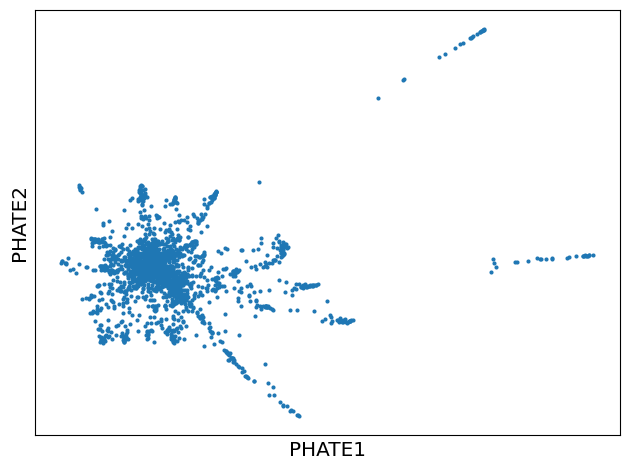

In [29]:
scprep.plot.scatter2d(X_phate, ticks=False, label_prefix="PHATE")

In [30]:
sc.tl.pca(adata, svd_solver='arpack')

In [32]:
adata.obsm['X_pca']

(2730, 50)

In [37]:
phate_operator2 = phate.PHATE()
X_phate2 = phate_operator2.fit_transform(adata.obsm['X_pca'])

Calculating PHATE...
  Running PHATE on 2730 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 2.16 seconds.
    Calculating affinities...
    Calculated affinities in 0.14 seconds.


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 1115 and 1482, 1115 and 1580, 1115 and 2144, 1482 and 1580, 1482 and 2144, 1529 and 1541, 1580 and 2144. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


  Calculated graph and diffusion operator in 2.40 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.73 seconds.
    Calculating KMeans...
    Calculated KMeans in 7.32 seconds.
  Calculated landmark operator in 9.84 seconds.
  Calculating optimal t...
    Automatically selected t = 36
  Calculated optimal t in 7.94 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 3.40 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.84 seconds.
Calculated PHATE in 32.45 seconds.


<Axes: xlabel='PHATE1', ylabel='PHATE2'>

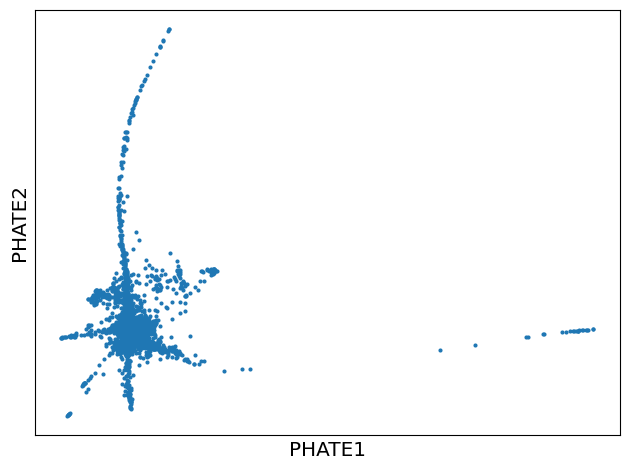

In [38]:
scprep.plot.scatter2d(X_phate2, ticks=False, label_prefix="PHATE")

In [39]:
adata.obsm['X_phate_pca'] = X_phate2

In [40]:
adata.write_h5ad('../data/BMMC_myeloid.h5ad')